### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes

    - time before it expires: 2 hours or one day

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [9]:
# understand the columns in the dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [11]:
# looks for columns with null values 
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [13]:
# As the column "car" has mostly missing values, drop the column. Also drop any null values in the otehr columns as the % of such rows is small
data.drop(labels='car',axis=1,inplace=True)
data.dropna(inplace=True)
# Verify that both are dropped 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null  ob

In [15]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [ ]:
# Now the data is clean with no null values

4. What proportion of the total observations chose to accept the coupon?



In [17]:
# determine the proportion of the people who accpted the coupon which is given in the column Y. This column has values 1 for yes and 0 for no
accepted_coupon_proportion = data['Y'].mean().round(2)
print(f"The proportion of total no of drivers that chose to accept the coupon is: {accepted_coupon_proportion}")

The proportion of total no of drivers that chose to accept the coupon is: 0.57


5. Use a bar plot to visualize the `coupon` column.

In [19]:
# To visualize data about coupons, lets get the different unique values for coupon 
data['coupon'].unique()

array(['Restaurant(<20)', 'Coffee House', 'Bar', 'Carry out & Take away',
       'Restaurant(20-50)'], dtype=object)

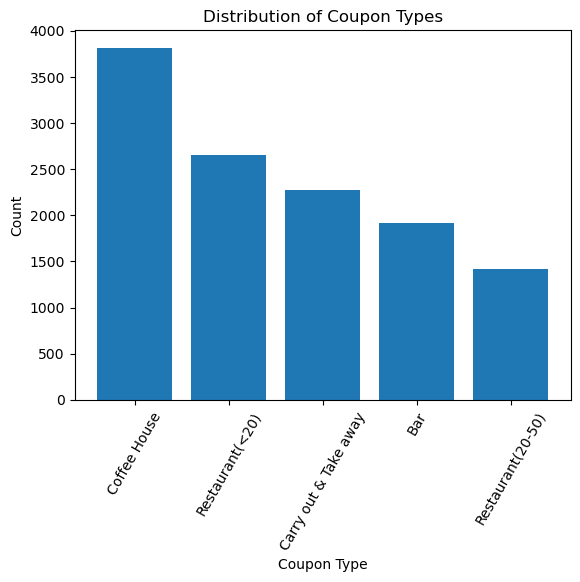

In [21]:
# Get the count for each of the coupon type 
coupon_counts = data['coupon'].value_counts()

# Plot a bar graph for each of the coupon types with counts. Adjust the x-axis labels
plt.bar(coupon_counts.index, coupon_counts.values)
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.title('Distribution of Coupon Types')
plt.xticks(rotation=60)
plt.show()

6. Use a histogram to visualize the temperature column.

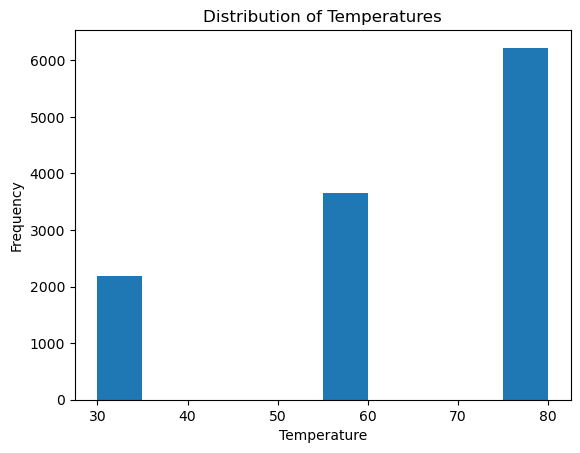

In [24]:
# Plot a histogram to visualize the temperature column 
plt.hist(data['temperature'], bins=10)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperatures')
plt.show()

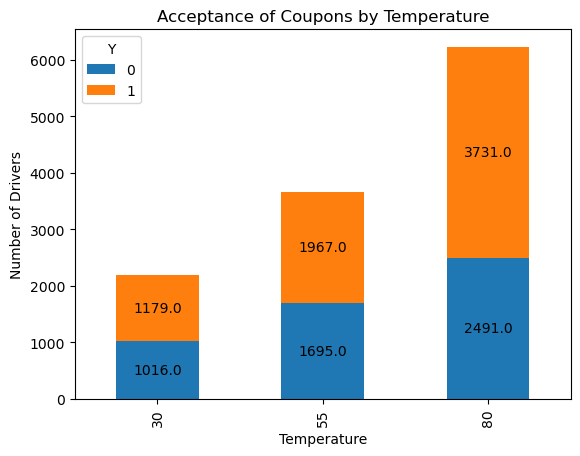

In [39]:
# Lets see how the coupon acceptance is based on different temparatures

# Group the data by 'temperature' and 'Y' and count the occurrences
temperature_acceptance_counts = data.groupby(['temperature', 'Y'])['Y'].count().unstack()

# Create a stacked bar plot
ax = temperature_acceptance_counts.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Temperature')
plt.ylabel('Number of Drivers')
plt.title('Acceptance of Coupons by Temperature')

# Add labels to each stack
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()


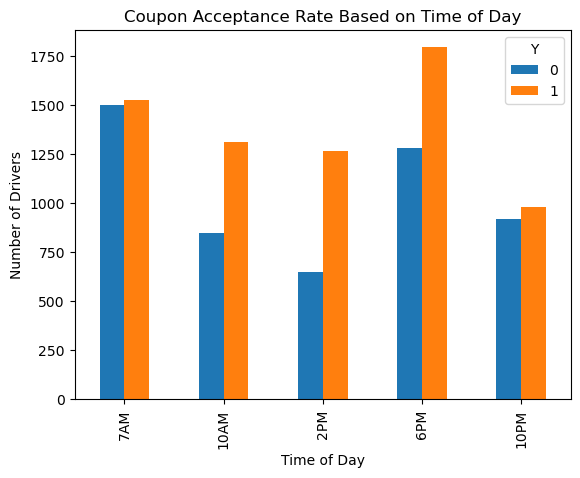

In [43]:
# Similarly, lets see how the coupon acceptance is based on different times of the day 

# Group the data by 'time' and 'Y' and count the occurrences
time_acceptance_counts = data.groupby(['time', 'Y'])['Y'].count().unstack()

# Reorder the time categories
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
time_acceptance_counts = time_acceptance_counts.reindex(time_order)

# Create a bar plot
time_acceptance_counts.plot(kind='bar')
plt.xlabel('Time of Day')
plt.ylabel('Number of Drivers')
plt.title('Coupon Acceptance Rate Based on Time of Day')
plt.show()

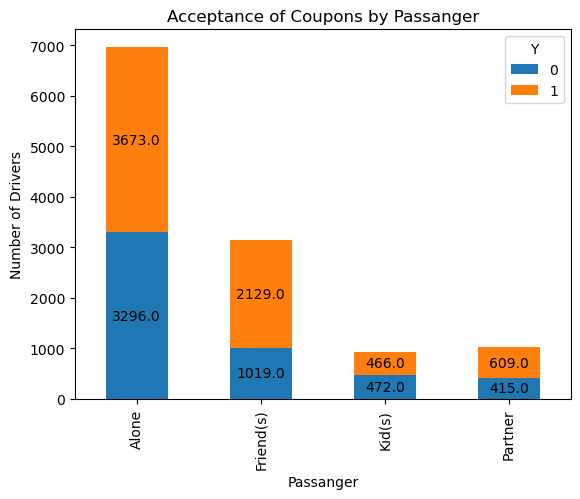

In [47]:
# Lets see how the coupon acceptance is based on different passangers

# Group the data by 'passanger' and 'Y' and count the occurrences
passanger_acceptance_counts = data.groupby(['passanger', 'Y'])['Y'].count().unstack()

# Create a stacked bar plot
bx = passanger_acceptance_counts.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Passanger')
plt.ylabel('Number of Drivers')
plt.title('Acceptance of Coupons by Passanger')

# get the data labels
for p in bx.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    bx.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

plt.show()

In [49]:
# Based on the data here are the observations on the overall data 
# 1. The coupon acceptance is higher when the temparature is around 80
# 2. The coupon acceptance rate is higher during the afternoon and evening time, I guess when people are not in a rush to reach somewhere
# 3. The coupon acceptance rate is higher when travelling with friends whit it is low when they are travelling with kids

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [51]:
# A new DataFrame that contains just the bar coupons
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
3105,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Married partner,...,less1,1~3,1~3,less1,1,0,0,1,0,0
3743,No Urgent Place,Partner,Sunny,80,10AM,Bar,2h,Female,26,Unmarried partner,...,less1,1~3,less1,1~3,1,0,0,0,1,0
2773,Work,Alone,Sunny,55,7AM,Bar,1d,Female,50plus,Married partner,...,never,less1,less1,less1,1,1,1,0,1,0
12310,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,36,Married partner,...,never,1~3,less1,less1,1,1,0,0,1,0
12548,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Married partner,...,less1,1~3,1~3,never,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [53]:
# The proportion of bar coupons accepted
bar_coupons_accepted = bar_coupons['Y'].mean().round(2)
print(f"The proportion of bar coupons accepted is: {bar_coupons_accepted}")

The proportion of bar coupons accepted is: 0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [55]:
# Understand what values are there in the Bar column
bar_coupons["Bar"].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [59]:
# Get the counts for each unique value
bar_counts = bar_coupons['Bar'].value_counts()
bar_counts

Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

In [61]:
# create a new series called bar_visits_lt3 with values of 'never'. 'less1' and '1~3'
bar_visits_lt3 = ['never', 'less1', '1~3']
# create a data frame from bar_coupons where Bar has values from bar_visits_lt3
bar_lt3 = bar_coupons[bar_coupons['Bar'].isin(bar_visits_lt3)]
# get the coupon acceptance rate for this group
accptance_rate_bar_lt3 = bar_lt3['Y'].mean().round(2)

# create a new series called bar_visits_lt3 with values of  'gt8', '4~8'
bar_visits_gt3 = ['gt8', '4~8']
# create a data frame from data where Bar has values from bar_visits_lt3
bar_gt3 = bar_coupons[bar_coupons['Bar'].isin(bar_visits_gt3)]
# get the coupon acceptance rate for this group
accptance_rate_bar_gt3 = bar_gt3['Y'].mean().round(2)

print(f"The proportion of bar coupons accepted who went to a bar 3 times or less is: {accptance_rate_bar_lt3}")
print(f"The proportion of bar coupons accepted who went to a bar more than 3 times is: {accptance_rate_bar_gt3}")

The proportion of bar coupons accepted who went to a bar 3 times or less is: 0.37
The proportion of bar coupons accepted who went to a bar more than 3 times is: 0.76


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [63]:
# Understand what are the unique values in age column
bar_coupons['age'].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [65]:
# The values of bar visits greater than 1 are '1~3', '4~8' and 'gt8'
bar_visits_gt1 = ['1~3', '4~8', 'gt8']
# the values where age is greater than 25 are '26', '31', '36', '41', '46' and '50plus' 
age_gt25 = ['46', '26', '31', '41', '50plus', '36']

#  acceptance rate of drivers who go to a bar more than once a month and are over the age of 25
bar_gt1 = bar_coupons[((bar_coupons['Bar'].isin(bar_visits_gt1)) 
                       & (bar_coupons['age'].isin(age_gt25)))]
acceptance_rate_bargt1_agegt25 = bar_gt1['Y'].mean().round(2)

#  acceptance rate of drivers in all other groups 
bar_others = bar_coupons[~((bar_coupons['Bar'].isin(bar_visits_gt1)) 
                           & (bar_coupons['age'].isin(age_gt25)))]
acceptance_rate_bar_others = bar_others['Y'].mean().round(2)

print(f"The proportion of bar coupons accepted who went to a bar 1 or more times and aged over 25 is: {acceptance_rate_bargt1_agegt25}")
print(f"The proportion of bar coupons accepted by all others is: {acceptance_rate_bar_others}")

The proportion of bar coupons accepted who went to a bar 1 or more times and aged over 25 is: 0.69
The proportion of bar coupons accepted by all others is: 0.34


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [67]:
# Understand the unique values for passinger 
bar_coupons['passanger'].unique()   

array(['Friend(s)', 'Alone', 'Kid(s)', 'Partner'], dtype=object)

In [69]:
# Understand the unique values for occupation 
bar_coupons['occupation'].unique()

array(['Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Unemployed', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Office & Administrative Support',
       'Construction & Extraction', 'Legal', 'Retired',
       'Community & Social Services', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [71]:
# The values of bar visits greater than 1 are '1~3', '4~8' and 'gt8'
bar_visits_gt11 = ['1~3', '4~8', 'gt8']
# Drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry
bar_new = bar_coupons[((bar_coupons['Bar'].isin(bar_visits_gt11)) 
                       & (~(bar_coupons['occupation'].isin(['Farming Fishing & Forestry'])))
                       & (~(bar_coupons['passanger'].isin(['Kid(s)']))))]
acceptance_rate_occ_f = bar_new['Y'].mean().round(2)

bar_other_new = bar_coupons[~((bar_coupons['Bar'].isin(bar_visits_gt11)) 
                              & (~(bar_coupons['occupation'].isin(['Farming Fishing & Forestry']))) 
                              & (~(bar_coupons['passanger'].isin(['Kid(s)']))))]
acceptance_rate_other_f = bar_other_new['Y'].mean().round(2)

print(f"The proportion of bar coupons accepted who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is: {acceptance_rate_occ_f}")
print(f"The proportion of bar coupons accepted by all others is: {acceptance_rate_other_f}")

The proportion of bar coupons accepted who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is: 0.71
The proportion of bar coupons accepted by all others is: 0.3


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [73]:
# Understand the different unique marital statuses
bar_coupons['maritalStatus'].unique()

array(['Single', 'Married partner', 'Unmarried partner', 'Divorced',
       'Widowed'], dtype=object)

In [77]:
# Go to bars more than once a month, had passengers that were not a kid, and were not widowed
bar_1kw = bar_coupons[((bar_coupons['Bar'].isin(bar_visits_gt11))
                       & (~(bar_coupons['maritalStatus'].isin(['Widowed'])))                       
                       & (~(bar_coupons['passanger'].isin(['Kid(s)']))))]
acceptance_rate_1kw = bar_1kw['Y'].mean().round(2)

print(f"The proportion of bar coupons accepted by that go to bars more than once a month, had passengers that were not a kid, and were not widowed is: {acceptance_rate_1kw}")

The proportion of bar coupons accepted by that go to bars more than once a month, had passengers that were not a kid, and were not widowed is: 0.71


In [79]:
# go to bars more than once a month and are under the age of 30
age_gt30 = ['46', '31', '41', '50plus', '36']
bar_lt30 = bar_coupons[((bar_coupons['Bar'].isin(bar_visits_gt11)) 
                       & (~(bar_coupons['age'].isin(age_gt30))))]
acceptance_rate_bar_lt30 = bar_lt30['Y'].mean().round(2)
print(f"The proportion of bar coupons accepted by that go to bars more than once a month and are under the age of 30 is: {acceptance_rate_bar_lt30}")

The proportion of bar coupons accepted by that go to bars more than once a month and are under the age of 30 is: 0.72


In [81]:
bar_coupons['income'].unique()   

array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

In [83]:
bar_coupons['RestaurantLessThan20'].unique()

array(['4~8', '1~3', 'less1', 'gt8', 'never'], dtype=object)

In [85]:
# go to cheap restaurants more than 4 times a month and income is less than 50K
income_lt50K = ['$12500 - $24999','$25000 - $37499','$37500 - $49999']
Rest_gt4 = ['4~8', 'gt8']

bar_inc_lt50 = bar_coupons[((bar_coupons['income'].isin(income_lt50K)) 
                       & (bar_coupons['RestaurantLessThan20'].isin(Rest_gt4)))]

acceptance_rate_bar_inc_lt50 = bar_inc_lt50['Y'].mean().round(2)
print(f"The proportion of bar coupons accepted by that go to cheap restaurants more than 4 times a month and income is less than 50K is: {acceptance_rate_bar_inc_lt50}")

The proportion of bar coupons accepted by that go to cheap restaurants more than 4 times a month and income is less than 50K is: 0.46


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [87]:
# Based on the above data, here are few inferences 
# 1. As frequency of the driver visits to bar increases, the acceptance rate of bar coupon goes higher. Any drivers who went to bar more than once accepted the bar coupon irrespective of their age group
# 2. Age is a factor in accepting Bar coupons, drivers 25 and above, that go to a bar every month are more likely to accept a Bar coupon
# 3. Drivers are more likely to accept a bar coupon if there are no kids in the passingers 
# 4. If income is lower than 50K, 1 in 2 people accepted the coupon for bar

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [89]:
# lets explore the coupon type "Coffee House"
# A new DataFrame that contains just the bar coupons
coffee_coupons = data[data['coupon'] == 'Coffee House']
coffee_coupons.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4961,Work,Alone,Sunny,55,7AM,Coffee House,1d,Male,31,Single,...,never,4~8,1~3,less1,1,1,0,0,1,0
4411,Work,Alone,Sunny,55,7AM,Coffee House,1d,Female,21,Single,...,never,less1,1~3,never,1,1,0,0,1,0
6637,Work,Alone,Sunny,55,7AM,Coffee House,1d,Male,26,Single,...,1~3,1~3,1~3,less1,1,1,1,0,1,1
8128,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,1d,Male,31,Single,...,never,gt8,1~3,never,1,0,0,0,1,0
1879,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1


In [91]:
# The proportion of coffee coupons accepted
coffee_coupons_accepted = coffee_coupons['Y'].mean().round(2)
print(f"The proportion of coffee coupons accepted is: {coffee_coupons_accepted}")

The proportion of coffee coupons accepted is: 0.5


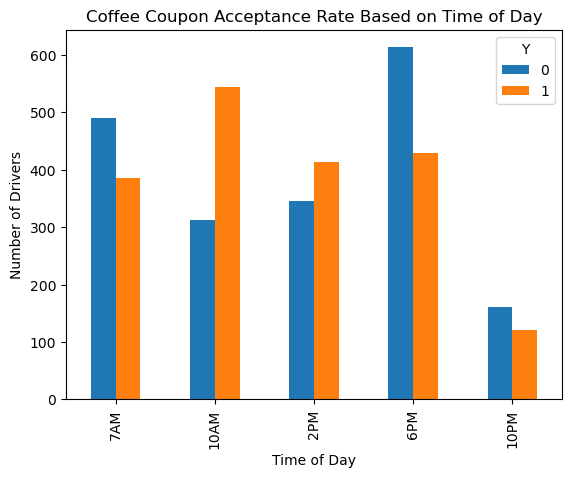

In [93]:
# Lets understand the impact of time of the day in acceptance rate of coffee coupons 

# Group the data by 'time' and 'Y' and count the occurrences
time_coffee_counts = coffee_coupons.groupby(['time', 'Y'])['Y'].count().unstack()

# Reorder the time categories
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
time_coffee_counts = time_coffee_counts.reindex(time_order)

# Create a bar plot
time_coffee_counts.plot(kind='bar')
plt.xlabel('Time of Day')
plt.ylabel('Number of Drivers')
plt.title('Coffee Coupon Acceptance Rate Based on Time of Day')
plt.show()

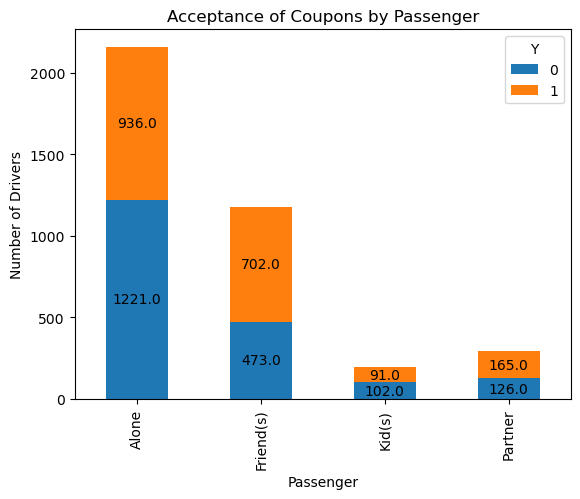

In [95]:
# Lets see how the copassinger impact the acceptance rate 

# Group the data by 'passenger' and 'Y' and count the occurrences
passenger_acceptance_counts = coffee_coupons.groupby(['passanger', 'Y'])['Y'].count().unstack()

# Create a stacked bar plot
cx = passenger_acceptance_counts.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Passenger')
plt.ylabel('Number of Drivers')
plt.title('Acceptance of Coupons by Passenger')

# get the data labels
for p in cx.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    cx.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

# Show the plot
plt.show()

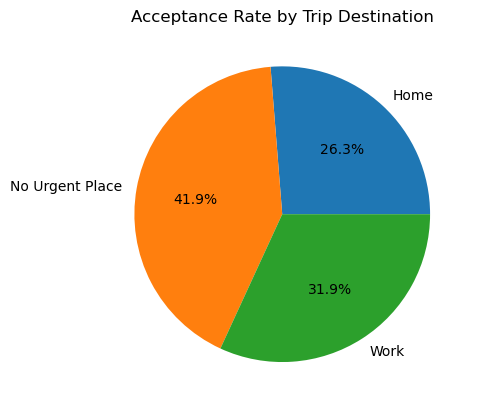

In [97]:
# Lets see how trip flexibility (e.g., no set destination vs. heading to work/meeting) impacts acceptance rate
# Create a pie chart showing the acceptance rate for each destination type

destination_acceptance_rates = coffee_coupons.groupby('destination')['Y'].mean()

# Create a pie chart
plt.pie(destination_acceptance_rates, labels=destination_acceptance_rates.index, autopct='%1.1f%%')
plt.title('Acceptance Rate by Trip Destination')
plt.show()

In [101]:
# lets understand how the visits to coffee house before impacts the acceptance rate of coffee coupon 
coffee_coupons['CoffeeHouse'].unique()

array(['less1', '4~8', '1~3', 'gt8', 'never'], dtype=object)

In [111]:
# The values of CoffeeHouse visits greater than 1 are '1~3', '4~8' and 'gt8'
coffee_visits_gt11 = ['1~3', '4~8', 'gt8']
# Drivers who go to CoffeeHouse more than once a month 
coffee_new = coffee_coupons[(coffee_coupons['CoffeeHouse'].isin(coffee_visits_gt11))]
acceptance_rate_coffee = coffee_new['Y'].mean().round(2)

coffee_other_new = coffee_coupons[~((coffee_coupons['Bar'].isin(bar_visits_gt11)))]
acceptance_rate_other_coffee = coffee_other_new['Y'].mean().round(2)

print(f"The proportion of coffee coupons accepted who go to coffee house more than once a month is: {acceptance_rate_coffee}")
print(f"The proportion of coffee coupons accepted by all others is: {acceptance_rate_other_coffee}")

The proportion of coffee coupons accepted who go to coffee house more than once a month is: 0.66
The proportion of coffee coupons accepted by all others is: 0.49


In [113]:
# Here are few inferences about Coffee Coupons based on data
# 1. The coffee coupon rate is higher in the late morning to early afteroon time
# 2. When the copassinger is a friend or a parner the coffee coupon acceptance rate goes much higher
# 3. If the there is no urgency to go to a desitnation, the drivers are more likely to accept the coupon
# 4. If the driver goes to Coffee house to get a coffee once a month or more, they are more likely to accept a coff coupon